<h1>Assignment - ML for Active Network Defense (Group 4)</h1>
<h3>Group Members:</h3>
<ul>
    <li>Ng Choy Hing Andy Kwet Man (22061333)</li>
    <li>Tahbib Manzoor (23120901)</li>
    <li>Kayvan Prassana Afif (23120488)</li>
    <li>Mohamed Ismail Mohamed Ishak (24063361)</li>
</ul>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings

# Remove warning if needed
warnings.filterwarnings('ignore')

<h3>-------------------------------------------ABOUT THE DATASET-----------------------------------------------</h3>
The dataset, titled "Malware Detection in Network Traffic Data", is obtained from Kaggle and authored by Agustin Parmisano, Sebastian Garcia, and Maria Jose Erquiaga. The dataset contains labeled network traffic data, including both malicious and benign connections, collected using the Zeek monitoring tool.
<ul>
    <li>Source: Kaggle - https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis</li>
    <li>Reference: Zeek Documentation on Labels - https://docs.zeek.org/en/lts/scripts/base/protocols/conn/main.zeek.html</li>
    <li>Files: 12 CSV files containing network traffic with 23 fields, including target labels.</li>	
</ul>

All individual csv files were merged into one.

In [23]:
d1 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', delimiter='|')
d2 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv', delimiter='|')
d3 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-8-1conn.log.labeled.csv', delimiter='|')
d4 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv', delimiter='|')
d5 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv', delimiter='|')
d6 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv', delimiter='|')
d7 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv', delimiter='|')
d8 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv', delimiter='|')
d9 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv', delimiter='|')
d10 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-44-1conn.log.labeled.csv', delimiter='|')
d11 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv', delimiter='|')
d12 = pd.read_csv('Dataset/CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv', delimiter='|')

dataset = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12], axis=0, ignore_index=True)

# If you want to get more information on the dataset please uncomment these lines
# print(dataset.shape)

In [24]:
# We print the dataset information
print('----------------------------DATASET FIRST 10 ROWS----------------------------\n')
print(dataset.head(10), '\n\n')
print('----------------------------DATASET LAST 10 ROWS----------------------------\n')
print(dataset.tail(10), '\n\n')
print('----------------------------DATASET INFORMATION----------------------------\n')
print(dataset.info(), '\n\n')

----------------------------DATASET FIRST 10 ROWS----------------------------

             ts                 uid        id.orig_h  id.orig_p  \
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103    51524.0   
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103    56305.0   
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103    41101.0   
3  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103    60905.0   
4  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103    44301.0   
5  1.525880e+09  CMBrup3BLXivSp4Avc  192.168.100.103    50244.0   
6  1.525880e+09  CfHl9r3XMYtDQRrHnh  192.168.100.103    34243.0   
7  1.525880e+09  C7USrA15nFVkniMqC5  192.168.100.103    34840.0   
8  1.525880e+09   CDtZ4so7bHKpIeCmi  192.168.100.103    58525.0   
9  1.525880e+09   Cj9lm7amKnWiNDh9c  192.168.100.103    43849.0   

         id.resp_h  id.resp_p proto service  duration orig_bytes resp_bytes  \
0   65.127.233.163       23.0   tcp       -  2.999051          0          0   
1    63.150.16.171       

<h3>-------------------------------------------DATASET OBSERVATIONS-----------------------------------------------</h3>
Current dimension of merged dataset has 25,011,003 observations by 23 columns

Two possible target variables - label and detailed-label. 
The label column classified the traffic as either benign or malicious, while the detailed-label column offered more detailed information about the malicious traffic, specifically identifying the type of malicious activity. 

<h3>-------------------------------------------DATA CLEANING-----------------------------------------------</h3>

<h5>--------Correcting datatypes-------</h5>
Some of the data types did not align with the field descriptions which required some adjustments. For example, the duration field, initially of type object, was corrected to float. The source and destination ip addresses were converted into categorical variables, abd the source and destination bytes were changed to int64 respectively.


In [25]:
dataset['id.orig_p'] = dataset['id.orig_p'].apply(str)
dataset['id.resp_p'] = dataset['id.resp_p'].apply(str)
dataset["duration"] = dataset['duration'].str.replace('-', '0').astype(float)
dataset["orig_bytes"] = dataset['orig_bytes'].str.replace('-', '0').fillna(0).astype(int)
dataset["resp_bytes"] = dataset['resp_bytes'].str.replace('-', '0').fillna(0).astype(int)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       object 
 4   id.resp_h       object 
 5   id.resp_p       object 
 6   proto           object 
 7   service         object 
 8   duration        float64
 9   orig_bytes      int64  
 10  resp_bytes      int64  
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(7), int64(2), object(14)
memory usage: 4.3+ GB
None


<h5>--------Missing Values-------</h5>
The field duration had 3375104 missing values and 9173954 for detailed-label. The missing values in the duration column were filled with the value 0 since it is a numerical type, while the missing values in the detailed-label column were filled with the string "None". Additionally, some categorical predictor variables also had no information in some observations and were being represented by the special character '-' which were also replaced with the string "None".

In [26]:
print(dataset.isnull().sum())
dataset['duration'] = dataset['duration'].fillna(0)
dataset = dataset.fillna('None')
dataset.replace('-', 'None', inplace=True)

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration          3375104
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    9173954
dtype: int64


<h5>--------Merging Target Variables and assigning proper labels-------</h5>
The target variables 'label' and detailed-label' were merged into a new column with header 'Target'. Additionally the values in the Target column were updated to ensure a consistent structure throughout the dataset and to improve overall data quality.


In [27]:
unique_counts = dataset['label'].value_counts()
unique_counts1 = dataset['detailed-label'].value_counts()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Unique values and their counts:")
print(unique_counts)
print(unique_counts1)

dataset['Target'] = dataset[['label', 'detailed-label']].agg(' '.join, axis=1)
dataset['Target'] = dataset['Target'].replace('Malicious PartOfAHorizontalPortScan', 'HorizontalPortScan')
dataset['Target'] = dataset['Target'].replace('Benign None', 'Benign')
dataset['Target'] = dataset['Target'].replace('Malicious C&C', 'C&C')
dataset['Target'] = dataset['Target'].replace('Malicious Attack', 'Exploit')
dataset['Target'] = dataset['Target'].replace('Malicious   C&C Torii', 'C&C')
dataset['Target'] = dataset['Target'].replace('Malicious   C&C None', 'C&C')
dataset['Target'] = dataset['Target'].replace('Malicious   PartOfAHorizontalPortScan None', 'HorizontalPortScan')
dataset['Target'] = dataset['Target'].replace('Malicious   C&C PartOfAHorizontalPortScan', 'C&C')
dataset['Target'] = dataset['Target'].replace('Malicious   DDoS None', 'DDoS')
dataset['Target'] = dataset['Target'].replace('Malicious   C&C FileDownload', 'FileDownload')
dataset['Target'] = dataset['Target'].replace('Malicious   Attack None', 'Exploit')
dataset['Target'] = dataset['Target'].replace('Malicious   FileDownload None', 'FileDownload')
dataset['Target'] = dataset['Target'].replace('Malicious   C&C HeartBeat', 'C&C')

unique_counts2 = dataset['Target'].value_counts()
print(unique_counts2)

Unique values and their counts:
label
Benign                                   8780158
Malicious                                7055007
Malicious   DDoS                         5778154
Malicious   PartOfAHorizontalPortScan    3386241
Malicious   C&C                             8685
Malicious   Attack                          2755
Malicious   FileDownload                       3
Name: count, dtype: int64
detailed-label
None                         17954112
PartOfAHorizontalPortScan     7041695
C&C                              8238
Attack                           5962
HeartBeat                         940
Torii                              30
FileDownload                       26
Name: count, dtype: int64
Target
HorizontalPortScan    10427048
Benign                 8780158
DDoS                   5778154
C&C                      16897
Exploit                   8717
FileDownload                29
Name: count, dtype: int64


<h5>--------Removing irrelavant or unnecessary information-------</h5>
The 'ts' (Timestamp of the connection event) and 'uid' (Unique identifier for the connection) fields were dropped from the dataset, as they do not contribute relevant information for the machine learning training process. Some fields like 'local_resp', 'local_orig' and 'tunnel_parents' didn't have information in any of the observations and were also dropped. The columns ‘label’ and ‘detailed-label’ were also removed since they were merged into the new column ‘Target’. The source ip addresses/port and destination ip addresses were dropped as well. This was necessary due to the limited processing power of our devices that couldn't handle the sheer amount of observations for these columns. The destination port was identified as a relevant feature that would contribute towards learning about the horizontalportscan attack label so we included that for some of the well known port numbers only due to limited processing power.

In [28]:
# Dropped from the dataset
dataset.drop(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'tunnel_parents', 
              'local_resp','local_orig', 'label', 'detailed-label'], axis=1, inplace=True)

# Uncomment the lines below to get the unique counts

# a = dataset['conn_state'].value_counts()
# b = dataset['service'].value_counts()
# c = dataset['proto'].value_counts()
# d = dataset['local_orig'].value_counts()
# e = dataset['local_resp'].value_counts()
# f = dataset['history'].value_counts()
# g = dataset['tunnel_parents'].value_counts

# print("Unique values and their counts:")
# print(a)
# print(b)
# print(c)
# print(d)
# print(e)
# print(f)
# print(g)

<h3>-------------------------------------------DATA PREPROCESSING----------------------------------------------</h3>

Before Sampling Majority Class


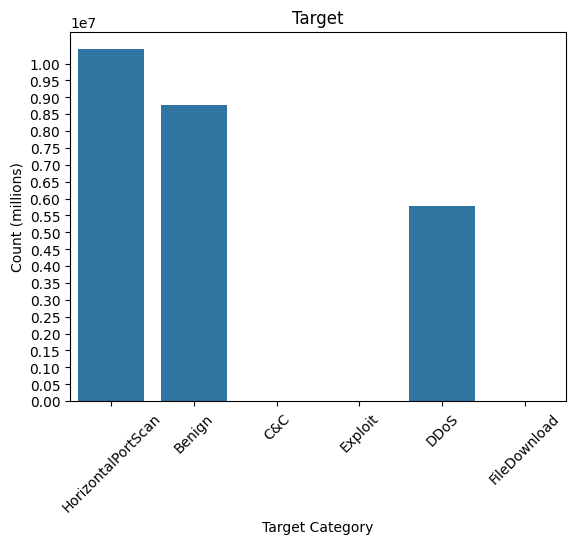

Target
HorizontalPortScan    10427048
Benign                 8780158
DDoS                   5778154
C&C                      16897
Exploit                   8717
FileDownload                29
Name: count, dtype: int64



After Sampling Majority Class


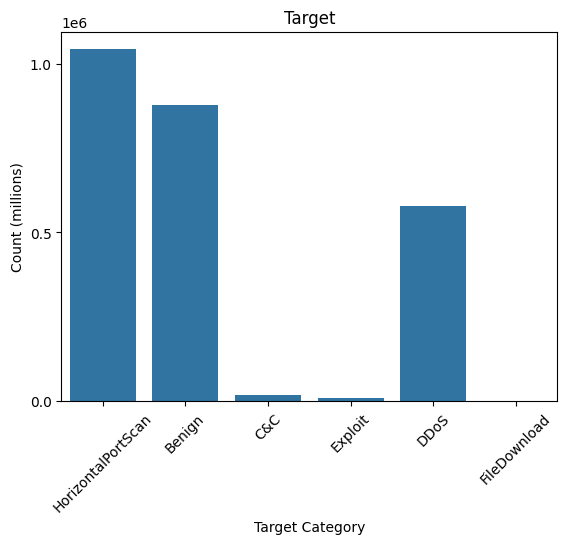

Target
HorizontalPortScan    1042705
Benign                 878016
DDoS                   577815
C&C                     16897
Exploit                  8717
FileDownload               29
Name: count, dtype: int64
(2524179, 14)


In [29]:
print('Before Sampling Majority Class')
sns.countplot(x='Target', data=dataset)
plt.title('Target')  # Add title
plt.xlabel('Target Category')  # Label for the x-axis
plt.ylabel('Count (millions)')  # Label for the y-axis
plt.yticks(range(0, int(dataset['Target'].value_counts().max()) + 1, 500000))
plt.xticks(rotation=45)  
plt.show()

unique_counts3 = dataset['Target'].value_counts()
pd.set_option('display.max_rows', None)
print(unique_counts3)

#Sampling majority classes
target_classes = ['Benign', 'HorizontalPortScan', 'DDoS']

sample_dataset = pd.DataFrame()

# Initialize an empty DataFrame for the sampled data
sample_dataset = pd.DataFrame()

# Iterate over each target class
for label in dataset['Target'].unique():
    if label in target_classes:  # Sample only from the specified classes
        # Filter the rows for the current class
        class_data = dataset[dataset['Target'] == label]

        reduced_class_data = class_data.sample(frac=0.1, random_state=42)

        # Append the reduced data to the new DataFrame
        sample_dataset = pd.concat([sample_dataset, reduced_class_data], ignore_index=True)
    else:
        # Append the full data for other classes
        class_data = dataset[dataset['Target'] == label]
        sample_dataset = pd.concat([sample_dataset, class_data], ignore_index=True)

print('\n\n')
print('After Sampling Majority Class')
sns.countplot(x='Target',data=sample_dataset)
plt.title('Target')  # Add title
plt.xlabel('Target Category')  # Label for the x-axis
plt.ylabel('Count (millions)')  # Label for the y-axis
plt.yticks(range(0, int(sample_dataset['Target'].value_counts().max()) + 1, 500000))
plt.xticks(rotation=45)  
plt.show()

unique_counts4 = sample_dataset['Target'].value_counts()
pd.set_option('display.max_rows', None)
print(unique_counts4)

print(sample_dataset.shape)

<h5>--------Checking Target class imbalance and sampling-------</h5>
The dataset exhibited a significant class imbalance, with the minority classes being C&C, Exploit, and Filedownload, comprising only 16897, 8717, and 29 observations, respectively. To address this issue, we considered three potential strategies: 
1.undersampling the majority classes
2.oversampling the minority classes using techniques such as SMOTE or ADASYN
3.Using weights to ensure the ML classifier assigns greater importance to the minority classes while reducing bias towards the majority class.

Given the limited processing power of our devices, a mix of solution 1 and 3 were used. The majority classes were randomly sampled at 10% effectively changing the number of observations to 2,524,179 instead of the initial 25,011,003.





<h5>------------------Calculation of class weights------------------------------</h5>
These are the class weights that will be fed to the machine learning classifier. The following formula was used: Total observations / (number of classes * observations in class)

In [30]:
target = sample_dataset['Target']

N = len(target)

# Get the unique classes
classes = target.unique()

# Calculate the frequency (number of observations per class)
class_frequencies = target.value_counts()

# Calculate class weights manually
class_weights = {}
for cls in classes:
    weight = N / (len(classes) * class_frequencies[cls])
    class_weights[cls] = weight

# Print out the class weights
print("Class Weights:", class_weights)

Class Weights: {'HorizontalPortScan': np.float64(0.40346646462805874), 'Benign': np.float64(0.47914445750419127), 'C&C': np.float64(24.89770373439072), 'Exploit': np.float64(48.26161523459906), 'DDoS': np.float64(0.7280816524320067), 'FileDownload': np.float64(14506.775862068966)}


<h5>-----------------------Onehot Encoding categorical features-------------------------------</h5>

Some machine learning classifiers cannot process categorical features inherently. Hence, the categorical features were onehot encoded to turn them into numerical datatypes and to overcome ordinality. The process of onehot encoding turn the values of each categorical features as its own columns and since there were some None values for service and history, this means that there would be 2 new columns with header 'service_None' and 'history_None which were consequently dropped. Furthermore, destination ports were also needed to be one hot encoded as they could be an important factor as well, since we were unable to encode all the ports due to limited processing power, we included only some of the well-known port numbers and decided to mark the rest as "Unknown". 
The new dimension of the sample dataset are 2524179 x 199

In [31]:
columns_to_encode = ['proto', 'service', 'conn_state', 'history', 'id.resp_p']
ports_to_encode = ['80.0', '8080.0', '23.0', '22.0', '443.0']
onehotencoder = OneHotEncoder()

sample_dataset['id.resp_p'] = sample_dataset['id.resp_p'].apply(
    lambda dstport: dstport if dstport in ports_to_encode else 'Unknown'
)

for column in columns_to_encode:
            
    encoded_array = onehotencoder.fit_transform(sample_dataset[column].values.reshape(-1, 1)).toarray()

    categories = onehotencoder.categories_[0]

    encoded_df = pd.DataFrame(encoded_array, columns=[f"{column}_{value}" for value in categories])

    sample_dataset = pd.concat([sample_dataset, encoded_df], axis=1)

    sample_dataset = sample_dataset.drop(column, axis=1)

sample_dataset.drop(['service_None', 'history_None'], axis=1, inplace=True)

print(sample_dataset.shape)


(2524179, 199)


<h5>-----------------------Label Encoding Target labels------------------------------------------</h5>
Similary to categorical features, some machine learning classifiers cannot process categorical targets. Label encoding was used in this case to turn the values in a numerical dataype.

In [32]:
Tg = sample_dataset['Target']

sample_dataset.drop(['Target'], axis=1, inplace=True)

Feature = sample_dataset

label_encoder = LabelEncoder()
Target = label_encoder.fit_transform(Tg)

print("Original Labels:", Tg.unique())  # Display unique original target labels
print("Encoded Labels:", Target)        # Display encoded target labels

# Print the label encoding mapping 
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Encoding Mapping:")
print(label_mapping)


Original Labels: ['HorizontalPortScan' 'Benign' 'C&C' 'Exploit' 'DDoS' 'FileDownload']
Encoded Labels: [5 5 5 ... 4 4 4]

Label Encoding Mapping:
{'Benign': np.int64(0), 'C&C': np.int64(1), 'DDoS': np.int64(2), 'Exploit': np.int64(3), 'FileDownload': np.int64(4), 'HorizontalPortScan': np.int64(5)}


<h5>-------------------Mapping Target label code to their Class weights-----------------------------</h5>

In [33]:

class_weights = {
    'HorizontalPortScan': np.float64(0.40346646462805874),
    'Benign': np.float64(0.47914445750419127),
    'C&C': np.float64(24.89770373439072),
    'Exploit': np.float64(48.26161523459906),
    'DDoS': np.float64(0.7280816524320067),
    'FileDownload': np.float64(14506.775862068966)
}


class_mapping = {
    'Benign': 0,
    'C&C': 1,
    'DDoS': 2,
    'Exploit': 3,
    'FileDownload': 4,
    'HorizontalPortScan': 5
}


encoded_class_weights = {class_mapping[label]: weight for label, weight in class_weights.items()}

# Display the result
print(encoded_class_weights)

{5: np.float64(0.40346646462805874), 0: np.float64(0.47914445750419127), 1: np.float64(24.89770373439072), 3: np.float64(48.26161523459906), 2: np.float64(0.7280816524320067), 4: np.float64(14506.775862068966)}


<h5>-----------------------------------Stratified Train/test split-------------------------------</h5>

A stratified split was used to ensure that the minority classes are not  entirely included in either the training or test set. Given the large amount of our dataset, a ratio of 60/40 was used to split the sample dataset into the training and test sets

In [34]:
Feature_train, Feature_test, Target_train, Target_test = train_test_split(Feature, Target, test_size=0.4, random_state=8, stratify=Target)

Target_train_pd = pd.Series(Target_train)
Target_test_pd = pd.Series(Target_test)

unique_counts5 = Target_train_pd.value_counts()
unique_counts6 = Target_test_pd.value_counts()
print(unique_counts5)
print(unique_counts6)

5    625623
0    526810
2    346689
1     10138
3      5230
4        17
Name: count, dtype: int64
5    417082
0    351206
2    231126
1      6759
3      3487
4        12
Name: count, dtype: int64


<h3>----------------------------RANDOM FOREST MODEL TRAINING, TESTING & EVALUATION----------------------------</h3>

<h5>---------------------------------Training Model (Random Forest)--------------------------------</h5>

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=9, class_weight=encoded_class_weights)
rf.fit(Feature_train, Target_train)

Feature_pred = rf.predict(Feature_test)

<h5>---------------------------------Testing Model (Random Forest)--------------------------------</h5>

Accuracy: 98.64%


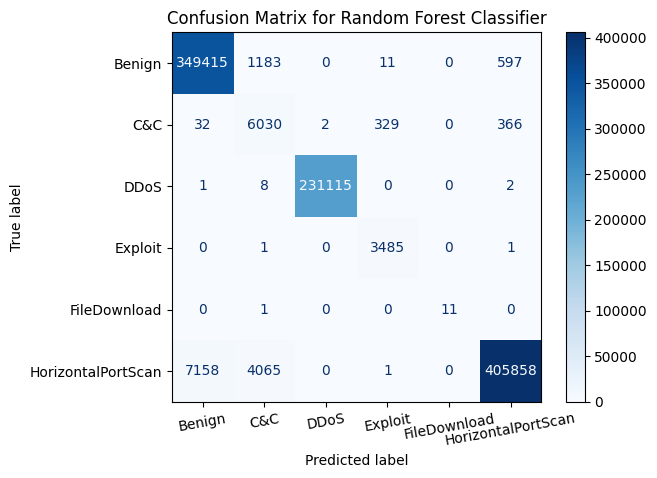

In [36]:
# Convert encoded predictions and test labels back to their original labels
Target_test_original = label_encoder.inverse_transform(Target_test)
Feature_pred_original = label_encoder.inverse_transform(Feature_pred)

# Calculate accuracy
accuracy = accuracy_score(Target_test_original, Feature_pred_original)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix using original labels
cm = confusion_matrix(Target_test_original, Feature_pred_original, labels=label_encoder.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues",values_format="d")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xticks(rotation=10)
plt.show()


In [37]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

precision, recall, f1, support = precision_recall_fscore_support(
    Target_test_original, 
    Feature_pred_original, 
    labels=label_encoder.classes_
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Support:", support)

report = classification_report(
    Target_test_original, 
    Feature_pred_original, 
    labels=label_encoder.classes_
)
print("\n\nClassification Report:\n", report)

Precision: [0.97983489 0.53419561 0.99999135 0.91087297 1.         0.99762551]
Recall: [0.99490043 0.89214381 0.99995241 0.99942644 0.91666667 0.97308922]
F1-score: [0.98731019 0.66825511 0.99997188 0.95309722 0.95652174 0.98520462]
Support: [351206   6759 231126   3487     12 417082]


Classification Report:
                     precision    recall  f1-score   support

            Benign       0.98      0.99      0.99    351206
               C&C       0.53      0.89      0.67      6759
              DDoS       1.00      1.00      1.00    231126
           Exploit       0.91      1.00      0.95      3487
      FileDownload       1.00      0.92      0.96        12
HorizontalPortScan       1.00      0.97      0.99    417082

          accuracy                           0.99   1009672
         macro avg       0.90      0.96      0.93   1009672
      weighted avg       0.99      0.99      0.99   1009672



<h5>---------------------------------Evaluation (Random Forest)--------------------------------</h5>

The model demonstrates excellent overall performance, achieving 98% accuracy and delivering strong results across most traffic types. The perfect F1-score for "DDoS" (1.00) and the near-perfect score for "HorizontalPortScan" (0.99) indicate that the model can identify these attacks with almost no errors. For "Benign" traffic, the high precision (0.98) and recall (0.99) suggest the model effectively distinguishes normal network activity from malicious traffic, minimizing false positives and false negatives.

The model also handles smaller classes like "Exploit" (F1-score: 0.95) and "FileDownload" (F1-score: 0.96) well, despite their limited representation in the dataset. However, for the "C&C" traffic class, while the model achieves a solid recall (0.89), successfully identifying most instances, its lower precision (0.53) means it mislabels other traffic types as "C&C," resulting in many false positives.

The overall F1-score of 0.93 reflects a good balance between precision and recall, indicating that the model performs well across all classes with a reasonable trade-off between false positives and false negatives.

In summary, the model excels at detecting major attacks such as "DDoS" and "HorizontalPortScan," providing strong protection against these common threats. The high scores for "Benign" traffic demonstrate its ability to accurately differentiate between normal and malicious activities, reducing unnecessary alerts. While the recall for "C&C" is strong, indicating good detection of this critical threat, the lower precision suggests that further improvements could reduce false positives.

<h3>------------------MULTILAYER PERCEPTRON (MLP) MODEL TRAINING, TESTING & EVALUATION------------------</h3>

<h5>---------------------------------Training Model (MLP)--------------------------------</h5>

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=10)  
mlp.fit(Feature_train, Target_train)

# Make predictions
Feature_pred = mlp.predict(Feature_test)

<h5>---------------------------------Testing Model (MLP)--------------------------------</h5>

Accuracy: 98.32%


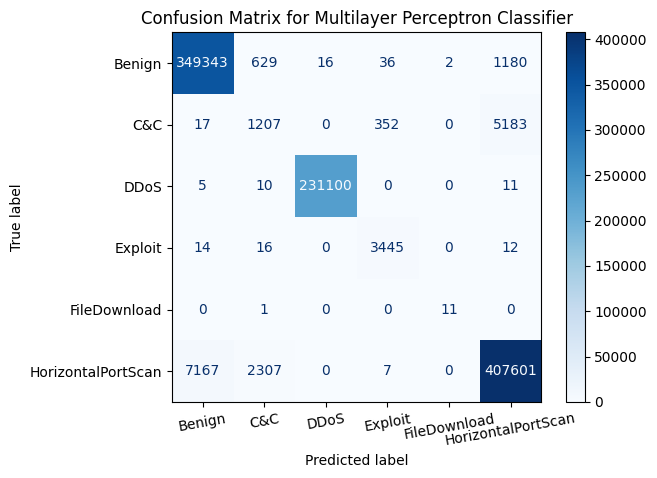

In [39]:
# Inverse transform to get original labels
Target_test_original = label_encoder.inverse_transform(Target_test)
Feature_pred_original = label_encoder.inverse_transform(Feature_pred)

# Calculate accuracy
accuracy = accuracy_score(Target_test_original, Feature_pred_original)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix using original labels
cm = confusion_matrix(Target_test_original, Feature_pred_original, labels=label_encoder.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format="d") 
plt.title("Confusion Matrix for Multilayer Perceptron Classifier")
plt.xticks(rotation=10)
plt.show()

In [40]:
precision, recall, f1, support = precision_recall_fscore_support(
    Target_test_original, 
    Feature_pred_original, 
    labels=label_encoder.classes_
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Support:", support)

report = classification_report(
    Target_test_original, 
    Feature_pred_original, 
    labels=label_encoder.classes_
)
print("\n\nClassification Report:\n", report)

Precision: [0.97979784 0.28944844 0.99993077 0.89713542 0.84615385 0.98457439]
Recall: [0.99469542 0.17857671 0.99988751 0.98795526 0.91666667 0.97726826]
F1-score: [0.98719043 0.22088023 0.99990914 0.94035758 0.88       0.98090772]
Support: [351206   6759 231126   3487     12 417082]


Classification Report:
                     precision    recall  f1-score   support

            Benign       0.98      0.99      0.99    351206
               C&C       0.29      0.18      0.22      6759
              DDoS       1.00      1.00      1.00    231126
           Exploit       0.90      0.99      0.94      3487
      FileDownload       0.85      0.92      0.88        12
HorizontalPortScan       0.98      0.98      0.98    417082

          accuracy                           0.98   1009672
         macro avg       0.83      0.84      0.83   1009672
      weighted avg       0.98      0.98      0.98   1009672



<h5>---------------------------------Evaluation (MLP)--------------------------------</h5>

The Multilayer Perceptron (MLP), a type of artificial neural network (ANN) configured with two hidden layers, each containing 100 neurons, was evaluated alongside the Random Forest Classifier. Both models achieved an accuracy of 98%, but the MLP showed a lower overall F1 score of 0.83. The MLP faced challenges in classifying minority classes, with an F1 score of 0.22 for C&C traffic and 0.88 for malicious File Download, compared to the Random Forest Classifier’s F1 scores of 0.67 for C&C and 0.96 for File Download.

To improve the models' predictive capabilities, particularly for the C&C class, several strategies could be considered:

- Augmenting Training Data: Increasing the labeled data for the C&C category would help the model capture the underlying patterns more effectively, addressing the misclassification of C&C traffic as benign or horizontal port scan.

- Utilizing Partial Dependence Plots (PDPs): Employing PDPs can reveal how individual features influence predictions for the C&C class. Identifying the most influential features allows for emphasizing these features in the training data, potentially enhancing classification performance.

- Addressing Class Imbalance Using Synthetic Data: Techniques like Synthetic Minority Over-sampling Technique (SMOTE) or Adaptive Synthetic Sampling (ADASYN) can help mitigate lower performance on minority classes by balancing the class distribution.

In summary, while both the MLP and Random Forest models perform well overall, improving their ability to classify C&C traffic requires a combination of data augmentation, class balancing, and model tuning. Implementing these strategies should help the models better capture the characteristics of minority classes and improve their predictive performance.